In [28]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt


In [29]:
# since month is in string format we are converting it into date time format

def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv("D:\sales-cars.csv",index_col = 0, parse_dates = [0] , date_parser = parser)

In [ ]:
sa

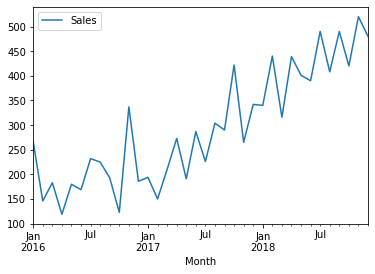

In [30]:
sales.plot()

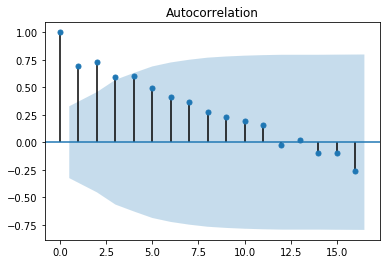

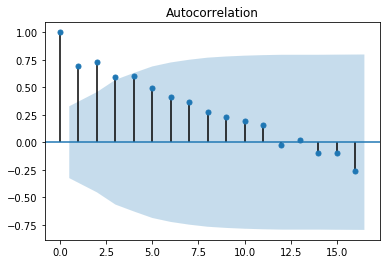

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

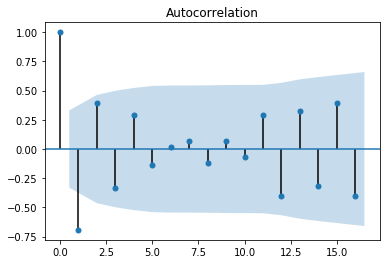

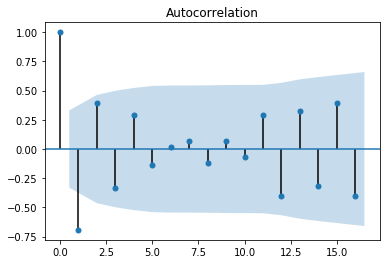

# Convertng Series to Stationary

In [32]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [33]:
sales_diff = sales.diff(periods = 1)

In [37]:
sales_diff = sales_diff[1:]

In [38]:
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


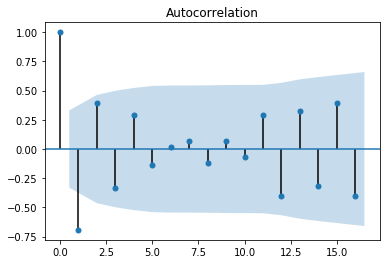

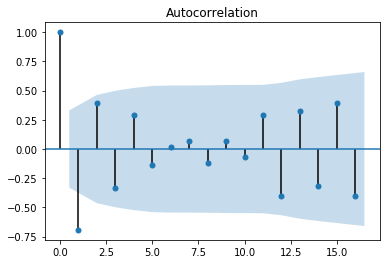

In [42]:
plot_acf(sales_diff)

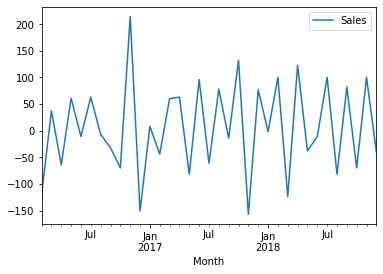

In [43]:
sales_diff.plot()

In [58]:
X = sales.values
train = X[0:27]   # data as train
test = X[27:]     # data as test
predictions = []

In [59]:
# AUTOREGRESSIVE MODEL

In [49]:
# import ARIMA model and accuracy metrics
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
#fit the data
model_ar = AR(train)
model_ar_fit = model_ar.fit()


In [52]:
predictions = model_ar_fit.predict(start = 27,end = 36)

In [53]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

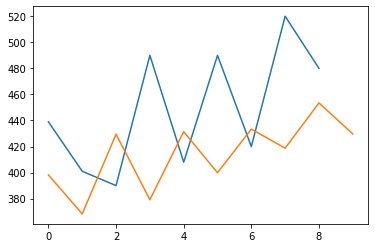

In [54]:
plt.plot(test)
plt.plot(predictions)

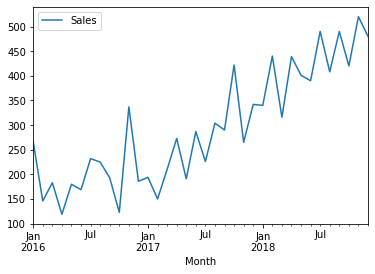

In [55]:
sales.plot()

# ARIMA MODEL

In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [95]:
#p,d,q p = periods taken for autoregressive model
# d-> Integrated order difference
# q periods in moving average model
model_arima = ARIMA(train,order=(4,2,1))
model_arima_fit = model_arima.fit()
print(model_ar_fit.aic)

9.193932045571167


In [96]:
predictions = model_arima_fit.forecast(steps = 10)[0]
predictions

array([419.8622191 , 399.60378085, 480.05781704, 431.16700923,
       488.8013932 , 488.07665638, 543.45028781, 535.49541695,
       575.01644311, 586.85572224])

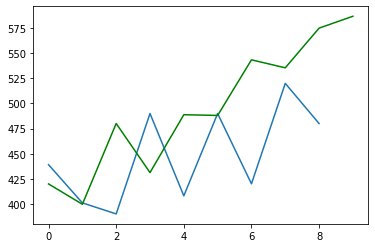

In [97]:
plt.plot(test)
plt.plot(predictions,color = 'green')

In [92]:
import itertools
p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [83]:
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(model_arima_fit.aic)
    except:
        continue
        

319.45285852307086
318.7244809384947
315.2506002896649
311.8293983488534
296.0841530678005
296.3229226907689
329.1834958250828
306.1019469685257
316.1668717534279
313.0487174406702


C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


310.9790642275034
298.8325442271006
297.12565112585196


C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


299.47166670629457
306.53077675708374
310.9969573612191


C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


342.5246358294303
300.20895612399573
297.99999301674006
298.55054281302245
306.2975856431866
